In [ ]:
!curl -L -O http://images.cocodataset.org/zips/train2014.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5G  100 12.5G    0     0  16.4M      0  0:13:04  0:13:04 --:--:-- 16.0M


In [ ]:
#!cp train2014.zip /content/drive/MyDrive/ADL/HW4/cocotrain2014.zip

In [ ]:
!unzip -q train2014.zip -d cocotrain

In [ ]:
!ls -lha
#!du -sh

total 13G
drwxr-xr-x 1 root root 4.0K Nov 20 21:17 .
drwxr-xr-x 1 root root 4.0K Nov 20 20:43 ..
drwxr-xr-x 3 root root 4.0K Nov 20 21:09 cocotrain
drwxr-xr-x 1 root root 4.0K Nov 13 17:34 .config
drwx------ 4 root root 4.0K Nov 20 20:44 drive
drwxr-xr-x 1 root root 4.0K Nov 13 17:33 sample_data
-rw-r--r-- 1 root root 1.3M Nov 20 21:17 starter2.csv
-rw-r--r-- 1 root root  13G Nov 20 20:58 train2014.zip


### Loading libraries

In [ ]:
!pip install Pillow # used to resize images

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import random
import shutil
import time
import pandas as pd


from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf

## Downloading starter csv file

In [ ]:
# Starter code to download small files
# Use this to download your starter CSV in notebook one and two.
# Also use it to download your thumbnails.zip in notebook two.
def download_if_missing(url, target, extract=True):
  if os.path.exists(target):
    return target
  return tf.keras.utils.get_file(target, origin=url, extract=extract)

In [ ]:
colab_root = "/content/"

csv_path = os.path.join(colab_root, "starter2.csv")
download_if_missing("https://storage.googleapis.com/applied-dl/mini-vqa/starter2.csv",
                     csv_path)

1335296/1329146 [==============================] - 0s 0us/step


'/content/starter2.csv'

In [ ]:
!head $csv_path -n3 # take a look at a few rows

is this man a professional baseball player,yes,COCO_train2014_000000458752.jpg
is the dog waiting,yes,COCO_train2014_000000524291.jpg
is the sky blue,yes,COCO_train2014_000000393221.jpg


In [ ]:
!wc -l $csv_path

20000 /content/starter2.csv


In [ ]:
def make_data(csv_path):

    df = pd.read_csv(csv_path, header=None)
    df.columns = ['question', 'answer', 'image']

    return df

df = make_data(csv_path)
df.head()

,question,answer,image
0,is this man a professional baseball player,yes,COCO_train2014_000000458752.jpg
1,is the dog waiting,yes,COCO_train2014_000000524291.jpg
2,is the sky blue,yes,COCO_train2014_000000393221.jpg
3,is the window open,yes,COCO_train2014_000000393223.jpg
4,is the man smiling,no,COCO_train2014_000000393224.jpg


In [ ]:
## check for all images 

coco_images_folder = 'cocotrain/train2014/'

for img in df['image']:
    assert os.path.exists(os.path.join(coco_images_folder, img))

In [ ]:
## Resizing images
size = 299, 299
coco_images_folder = 'cocotrain/train2014/'
output_directory = '/content/drive/MyDrive/ADL/HW4/cocotrain_subset/'

for img in df['image']:
    path_to_image = os.path.join(coco_images_folder, img)
    im = Image.open(path_to_image)
    im.thumbnail(size)
    out_file = os.path.join(output_directory, img)
    im.save(out_file, "JPEG")

Image size:  (200, 299)


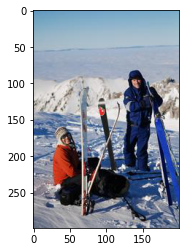

In [ ]:
## verify images and its size

# randomly sample images from starter csv and check its dimensions
img = np.random.choice(df['image'])
im = Image.open(os.path.join(output_directory, img))
plt.imshow(im)
print('Image size: ',im.size)


In [ ]:
## removing original images and zip file
!rm -rf train2014.zip
print('deleted zip file')
!rm -rf -r cocotrain
print('Deleted unzipped images')

## Check for all resized images

for img in df['image']:
    assert os.path.exists(os.path.join(output_directory, img))

In [ ]:
## Zipping the resized data
shutil.make_archive('thumbnails', 'zip', output_directory)

'/content/thumbnails.zip'

In [ ]:
print(os.path.getsize("thumbnails.zip"), 'bytes')

267874499 bytes
